# Discretisers

In this notebook, I will show you how to use the different discretisers in feature_engine to divide numerical variables into bins.

For the demo, I will use the house price dataset, available in [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from importlib import reload

from feature_engine import discretisers as dsc

In [2]:
def load_houseprice():
    data = pd.read_csv('houseprice.csv')
    return data

In [3]:
data = load_houseprice()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
var_no_nulls = [x for x in data.columns if data[x].isnull().sum()==0 and data[x].dtypes !='O']

data[var_no_nulls].dtypes

Id               int64
MSSubClass       int64
LotArea          int64
OverallQual      int64
OverallCond      int64
YearBuilt        int64
YearRemodAdd     int64
BsmtFinSF1       int64
BsmtFinSF2       int64
BsmtUnfSF        int64
TotalBsmtSF      int64
1stFlrSF         int64
2ndFlrSF         int64
LowQualFinSF     int64
GrLivArea        int64
BsmtFullBath     int64
BsmtHalfBath     int64
FullBath         int64
HalfBath         int64
BedroomAbvGr     int64
KitchenAbvGr     int64
TotRmsAbvGrd     int64
Fireplaces       int64
GarageCars       int64
GarageArea       int64
WoodDeckSF       int64
OpenPorchSF      int64
EnclosedPorch    int64
3SsnPorch        int64
ScreenPorch      int64
PoolArea         int64
MiscVal          int64
MoSold           int64
YrSold           int64
SalePrice        int64
dtype: object

## EqualFrequencyDiscretiser

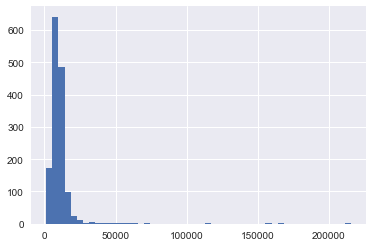

In [5]:
data['LotArea'].hist(bins=50)

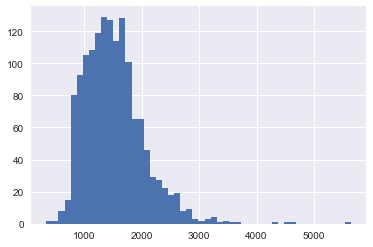

In [6]:
data['GrLivArea'].hist(bins=50)

In [7]:
efd = dsc.EqualFrequencyDiscretiser(q=10, variables = ['LotArea', 'GrLivArea'])
efd.fit(data)

EqualFrequencyDiscretiser(q=10, variables=['LotArea', 'GrLivArea'])

In [8]:
# binner_dict contains the boundaries of the different bins
efd.binner_dict

{'GrLivArea': [-inf,
  912.0,
  1066.5999999999999,
  1208.0,
  1339.0,
  1464.0,
  1578.0,
  1709.3000000000002,
  1869.0,
  2158.3000000000002,
  inf],
 'LotArea': [-inf,
  5000.0,
  7078.4000000000005,
  8063.6999999999998,
  8793.3999999999996,
  9478.5,
  10198.200000000001,
  11066.5,
  12205.799999999999,
  14381.70000000001,
  inf]}

In [9]:
data_tf = efd.transform(data)

In [10]:
# the numbers are the different bins / buckets into which the observations
# were sorted
data_tf['GrLivArea'].unique()

array([7, 3, 9, 4, 6, 8, 2, 1, 0, 5], dtype=int64)

In [11]:
# the numbers are the different bins / buckets into which the observations
# were sorted
data_tf['LotArea'].unique()

array([3, 5, 7, 8, 6, 1, 2, 0, 9, 4], dtype=int64)

In [12]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,7
1,1262,3
2,1786,7
3,1717,7
4,2198,9


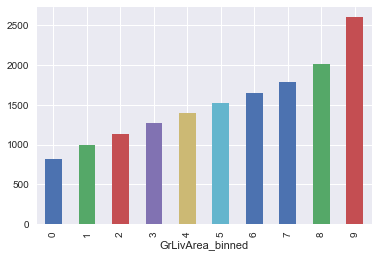

In [13]:
# we see that the mean value of the variable increases with the bin number
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

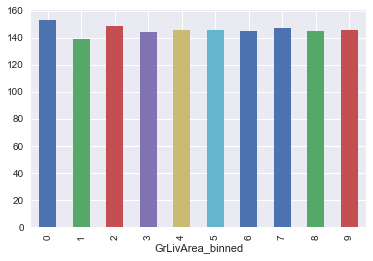

In [14]:
# in  equal frequency discretisation, we tend to have the same amount of observations
# in each one of the bins.
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

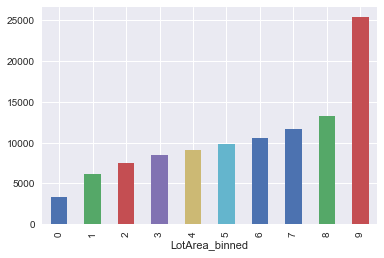

In [15]:
# here I put side by side the original variable and the transformed variable
tmp = pd.concat([data['LotArea'], data_tf['LotArea']], axis=1)
tmp.columns = ['LotArea', 'LotArea_binned']

# we see that the mean value of the variable increases with the bin number
tmp.groupby('LotArea_binned')['LotArea'].mean().plot.bar()

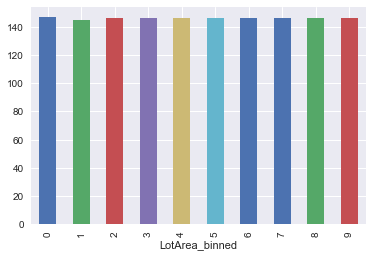

In [16]:
# in  equal frequency discretisation, we tend to have the same amount of observations
# in each one of the bins.

tmp.groupby('LotArea_binned')['LotArea'].count().plot.bar()

## EqualWidthDiscretiser

In [17]:
data = load_houseprice()

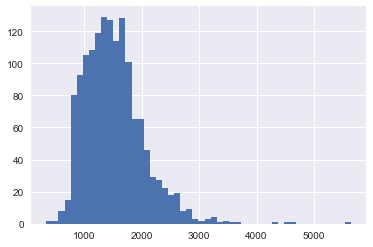

In [18]:
data['GrLivArea'].hist(bins=50)

In [19]:
ewd = dsc.EqualWidthDiscretiser(bins=10, variables = ['LotArea', 'GrLivArea'])
ewd.fit(data)

EqualWidthDiscretiser(bins=10, variables=['LotArea', 'GrLivArea'])

In [20]:
# binner_dict contains the boundaries of the bins
ewd.binner_dict

{'GrLivArea': [-inf,
  864.79999999999995,
  1395.5999999999999,
  1926.3999999999999,
  2457.1999999999998,
  2988.0,
  3518.7999999999997,
  4049.5999999999995,
  4580.3999999999996,
  5111.1999999999998,
  inf],
 'LotArea': [-inf,
  22694.5,
  44089.0,
  65483.5,
  86878.0,
  108272.5,
  129667.0,
  151061.5,
  172456.0,
  193850.5,
  inf]}

In [21]:
data_tf = ewd.transform(data)

In [22]:
# the below are the bins into which the observations were sorted
data_tf['GrLivArea'].unique()

array([2, 1, 3, 0, 4, 5, 6, 8, 7, 9], dtype=int64)

In [23]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,2
1,1262,1
2,1786,2
3,1717,2
4,2198,3


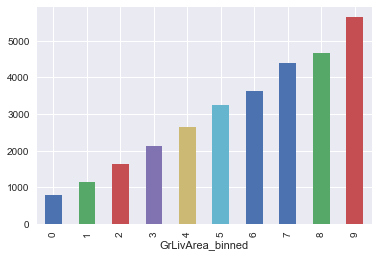

In [24]:
# the value of the variable increases with the bin number
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

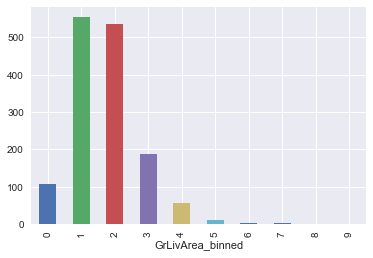

In [25]:
# in the equal width discretisers, each bucket / bin does not necessarily contain
# the same number of observations.
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

## DecisionTreeDiscretiser

In [26]:
data = load_houseprice()

In [28]:
treeDisc = dsc.DecisionTreeDiscretiser(cv = 3, scoring='neg_mean_squared_error',
                                        variables = ['LotArea', 'GrLivArea'],
                                       regression=True)

treeDisc.fit(data, data.SalePrice)

DecisionTreeDiscretiser(cv=3, regression=True,
            scoring='neg_mean_squared_error',
            variables=['LotArea', 'GrLivArea'])

In [29]:
# the binner contains the best decision tree for each variable
treeDisc.binner_dict

{'GrLivArea': DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
 'LotArea': DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')}

In [30]:
data_tf = treeDisc.transform(data)

In [31]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 2 bins is enough
data_tf['GrLivArea'].unique()

array([ 228771.77777778,  137687.22816167])

In [32]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 2 bins is enough
data_tf['LotArea'].unique()

array([ 158705.40298507,  229991.24395604])

In [33]:
tmp = pd.concat([data['GrLivArea'], data_tf['GrLivArea']], axis=1)
tmp.columns = ['GrLivArea', 'GrLivArea_binned']
tmp.head()

,GrLivArea,GrLivArea_binned
0,1710,228771.777778
1,1262,137687.228162
2,1786,228771.777778
3,1717,228771.777778
4,2198,228771.777778


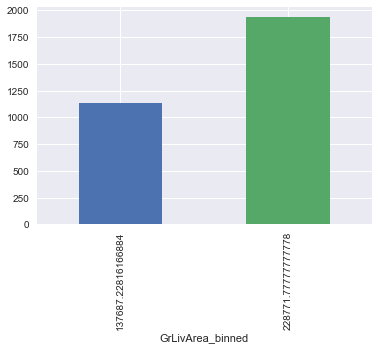

In [34]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].mean().plot.bar()

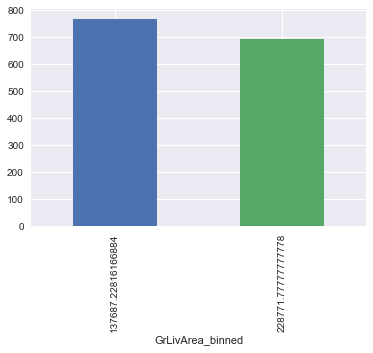

In [35]:
tmp.groupby('GrLivArea_binned')['GrLivArea'].count().plot.bar()

### Decision tree discretiser for classfication

In [36]:
# function to load the titanic dataset, and get the first letter of the variable cabin
# we will load the dataset multiple times during the demo

def load_titanic():
    data = pd.read_csv('titanic.csv')
    data['Cabin'] = data['Cabin'].astype(str).str[0]
    data['Pclass'] = data['Pclass'].astype('O')
    data['Embarked'].fillna('C', inplace=True)
    return data

In [37]:
# load data
data = load_titanic()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,n,S


In [38]:
treeDisc = dsc.DecisionTreeDiscretiser(cv = 3, scoring='roc_auc',
                                        variables = ['Fare', 'Age'],
                                       regression=False)

treeDisc.fit(data.fillna(0), data.Survived)

DecisionTreeDiscretiser(cv=3, regression=False, scoring='roc_auc',
            variables=['Fare', 'Age'])

In [39]:
treeDisc.binner_dict

{'Age': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best'),
 'Fare': DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=None, splitter='best')}

In [40]:
data_tf = treeDisc.transform(data.fillna(0))

In [41]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 6 bins is enough
data_tf['Age'].unique()

array([ 0.38957055,  0.29378531,  0.47058824,  0.7826087 ,  0.        ,  1.        ])

In [42]:
# the below account for the best obtained bins
# in this case, the tree has found that dividing the data in 8 bins is enough
data_tf['Fare'].unique()

array([ 0.26811594,  0.25      ,  0.19827586,  0.75675676,  0.42431762,
        0.76666667,  1.        ,  0.02564103,  0.        ,  0.5       ,
        0.03846154])

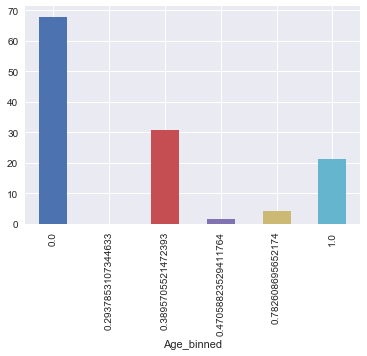

In [43]:
tmp = pd.concat([data['Age'].fillna(0), data_tf['Age']], axis=1)
tmp.columns = ['Age', 'Age_binned']

tmp.groupby('Age_binned')['Age'].mean().plot.bar()

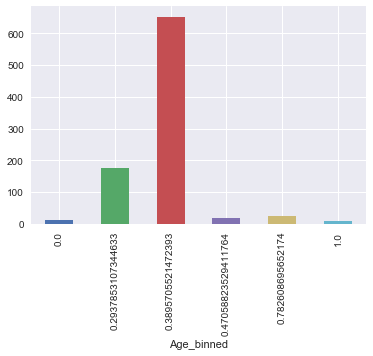

In [44]:
tmp.groupby('Age_binned')['Age'].count().plot.bar()

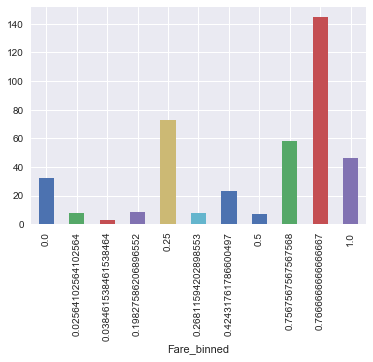

In [45]:
tmp = pd.concat([data['Fare'].fillna(0), data_tf['Fare']], axis=1)
tmp.columns = ['Fare', 'Fare_binned']

tmp.groupby('Fare_binned')['Fare'].mean().plot.bar()

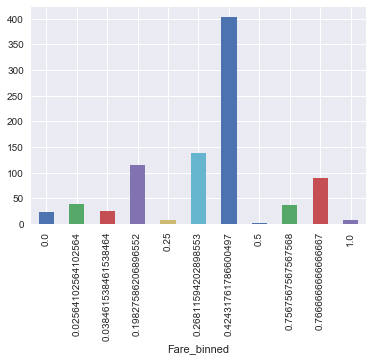

In [46]:
tmp.groupby('Fare_binned')['Fare'].count().plot.bar()